#Wizualizacja danych dotyczących wypożyczania rowerów w Londynie

#**Założenia**
1. Zbadanie korelacji pomiędzy zmiennymi.
2. Sprawdzenie, jak zmienia się liczba wypożyczeń w zależności od pogody.
3. Zweryfikowanie rozkładu liczby wypożyczeń w poszczególnych latach, miesiącach, dniach oraz porach dnia.
4. Utworzenie interaktywnych wykresów.

#**Zbiór danych - wypożyczanie rowerów w Londynie**

Źródło: kaggle.com


Zmienne użyte w projekcie:


* "timestamp" - data i godzina wypożyczeń,
* "cnt" - suma wypożyczeń rowerów w danym czasie,
* "t1" - temperatura powietrza (w st. Celsjusza),
* "t2" - odczuwalna temperatura powietrza (w st. Celsjusza),
* "hum" - wilgotność powietrza (w %),
* "windspeed" - prędkość wiatru ( w km/h),
* "weathercode" - rodzaj pogody (1-czyste niebo, "przyjemna pogoda"; 2-niewielkie zachmurzenie; 3-rozproszone chmury; 4-pochmurnie; 7-przelotny i umiarkowany deszcz; 10-burza; 26-opady śniegu; 94-mroźna mgła),
* "isholiday" -czy są wakacje, święto (0-nie; 1-tak),
* "isweekend" - czy jest weekend (0-nie; 1-tak),
* "season" - pora roku (0-wiosna; 1-lato; 2-jesień; 3-zima).


In [ ]:
!git clone https://github.com/Paulina1010/Projekt-INWD.git

fatal: destination path 'Projekt-INWD' already exists and is not an empty directory.


In [ ]:
!ls

Projekt-INWD  sample_data


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact
from plotnine import *

Wczytanie danych

In [ ]:
dane = pd.read_csv('https://raw.githubusercontent.com/Paulina1010/Projekt-INWD/main/london_merged.csv', sep =",")
print(dane)

                 timestamp   cnt   t1  ...  is_holiday  is_weekend  season
0      2015-01-04 00:00:00   182  3.0  ...         0.0         1.0     3.0
1      2015-01-04 01:00:00   138  3.0  ...         0.0         1.0     3.0
2      2015-01-04 02:00:00   134  2.5  ...         0.0         1.0     3.0
3      2015-01-04 03:00:00    72  2.0  ...         0.0         1.0     3.0
4      2015-01-04 04:00:00    47  2.0  ...         0.0         1.0     3.0
...                    ...   ...  ...  ...         ...         ...     ...
17409  2017-01-03 19:00:00  1042  5.0  ...         0.0         0.0     3.0
17410  2017-01-03 20:00:00   541  5.0  ...         0.0         0.0     3.0
17411  2017-01-03 21:00:00   337  5.5  ...         0.0         0.0     3.0
17412  2017-01-03 22:00:00   224  5.5  ...         0.0         0.0     3.0
17413  2017-01-03 23:00:00   139  5.0  ...         0.0         0.0     3.0

[17414 rows x 10 columns]


Sprawdzenie wielkości danych

In [ ]:
dane.shape

(17414, 10)

Zbiór posiada 11 kolumn i 17 414 wierszy.

Sprawdzenie czy w zbiorze występują braki danych

In [ ]:
nulls_summary = pd.DataFrame(dane.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(dane.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((dane.isnull().mean()*100),2)
print(nulls_summary)

              Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
timestamp     False                   0               0.0
cnt           False                   0               0.0
t1            False                   0               0.0
t2            False                   0               0.0
hum           False                   0               0.0
wind_speed    False                   0               0.0
weather_code  False                   0               0.0
is_holiday    False                   0               0.0
is_weekend    False                   0               0.0
season        False                   0               0.0


W naszym zbiorze nie występują braki danych.

Dodanie kolumny date i time.

In [ ]:
dane['timestamp'] = pd.to_datetime(dane['timestamp'])
new_dates, new_times = zip(*[(d.date(), d.time()) for d in dane['timestamp']])
dane = dane.assign(date=new_dates, time=new_times)
dane

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04,00:00:00
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04,01:00:00
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04,02:00:00
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01-04,03:00:00
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01-04,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017-01-03,19:00:00
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017-01-03,20:00:00
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017-01-03,21:00:00
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017-01-03,22:00:00


Podział daty na poszczególne lata, miesiące i dni tygodnia.

In [ ]:
dane['month'] = dane['timestamp'].dt.month
dane['year'] = dane['timestamp'].dt.year
dane['day_of_week'] = dane['timestamp'].dt.day_name()
dane


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time,month,year,day_of_week
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04,00:00:00,1,2015,Sunday
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04,01:00:00,1,2015,Sunday
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04,02:00:00,1,2015,Sunday
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01-04,03:00:00,1,2015,Sunday
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01-04,04:00:00,1,2015,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017-01-03,19:00:00,1,2017,Tuesday
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017-01-03,20:00:00,1,2017,Tuesday
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017-01-03,21:00:00,1,2017,Tuesday
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017-01-03,22:00:00,1,2017,Tuesday


Dodanie pory dnia.

In [ ]:
def Time_of_a_day(d):
  noc = [23,0,1,2,3,4,5]
  ranek = [6,7,8,9,10]
  przedpoludnie = [11,12]
  popoludnie = [13,14,15,16,17]
  wieczor = [18,19,20,21,22]
  result = 'blad'
  if d in noc:
    result = 'noc'
  elif d in ranek:
    result = 'ranek'
  elif d in przedpoludnie:
    result = 'przedpołudnie'
  elif d in popoludnie:
    result = 'popołudnie'
  elif d in wieczor:
    result = 'wieczór'
  return result

dane['hour'] = dane['timestamp'].dt.hour
rowIndex = 0
for d in dane['hour']:
  dane.loc[rowIndex, 'time_of_a_day'] = Time_of_a_day(d)
  rowIndex += 1
dane.head(30)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time,month,year,day_of_week,hour,time_of_a_day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04,00:00:00,1,2015,Sunday,0,noc
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04,01:00:00,1,2015,Sunday,1,noc
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04,02:00:00,1,2015,Sunday,2,noc
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01-04,03:00:00,1,2015,Sunday,3,noc
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01-04,04:00:00,1,2015,Sunday,4,noc
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0,2015-01-04,05:00:00,1,2015,Sunday,5,noc
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015-01-04,06:00:00,1,2015,Sunday,6,ranek
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015-01-04,07:00:00,1,2015,Sunday,7,ranek
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0,2015-01-04,08:00:00,1,2015,Sunday,8,ranek
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0,2015-01-04,09:00:00,1,2015,Sunday,9,ranek


Usunięcie wartości odstających

In [ ]:
pd.pivot_table(dane,
    index=["year"],
    values=["month"],
    aggfunc=[len])

,len
,month
year,
2015,8643
2016,8699
2017,72


In [ ]:
dane1=dane['year'].isin(['2015','2016'])
nowe_dane=dane[dane1]
nowe_dane

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time,month,year,day_of_week,hour,time_of_a_day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01-04,00:00:00,1,2015,Sunday,0,noc
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01-04,01:00:00,1,2015,Sunday,1,noc
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01-04,02:00:00,1,2015,Sunday,2,noc
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01-04,03:00:00,1,2015,Sunday,3,noc
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01-04,04:00:00,1,2015,Sunday,4,noc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17337,2016-12-31 19:00:00,493,9.0,6.0,82.0,17.0,4.0,0.0,1.0,3.0,2016-12-31,19:00:00,12,2016,Saturday,19,wieczór
17338,2016-12-31 20:00:00,465,8.5,6.5,84.5,13.0,4.0,0.0,1.0,3.0,2016-12-31,20:00:00,12,2016,Saturday,20,wieczór
17339,2016-12-31 21:00:00,474,8.0,6.0,87.0,12.0,4.0,0.0,1.0,3.0,2016-12-31,21:00:00,12,2016,Saturday,21,wieczór
17340,2016-12-31 22:00:00,587,8.0,6.0,90.0,12.0,4.0,0.0,1.0,3.0,2016-12-31,22:00:00,12,2016,Saturday,22,wieczór


In [ ]:
pd.pivot_table(nowe_dane,
    index=["year"],
    values=["month"],
    aggfunc=[len])

,len
,month
year,
2015,8643
2016,8699


Macierz korelacji

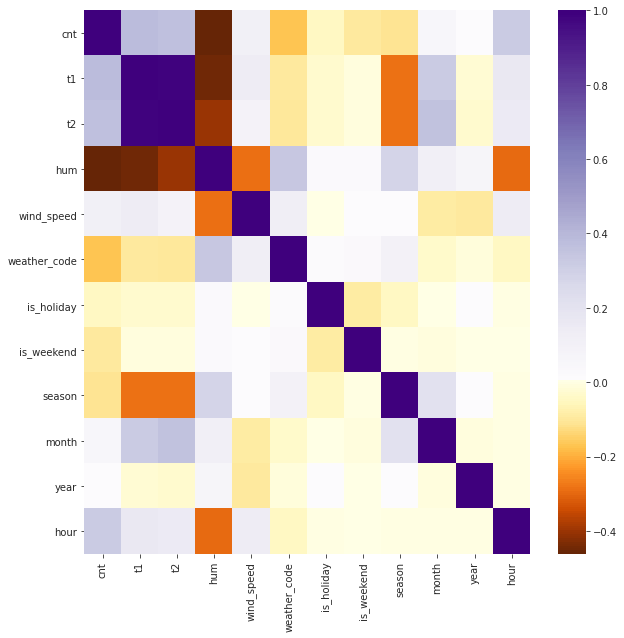

In [ ]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
top = cm.get_cmap('YlOrBr_r', 128)
bottom = cm.get_cmap('Purples', 128) #BuPu', Purples, YlGn

newcolors = np.vstack((top(np.linspace(0, 1, 85)),
                       bottom(np.linspace(0, 1, 180))))
newcmp = ListedColormap(newcolors, name='myColormap')

corr = nowe_dane.corr() # korelacja Pearsona
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap=newcmp)

In [ ]:
@interact
def correlations(kolumna_1 = list(nowe_dane.select_dtypes('number').columns),
                 kolumna_2 = list(nowe_dane.select_dtypes('number').columns)):
    print("Korelacja: \t {}".format(nowe_dane[kolumna_1].corr(nowe_dane[kolumna_2])))

interactive(children=(Dropdown(description='kolumna_1', options=('cnt', 't1', 't2', 'hum', 'wind_speed', 'weat…

*   Korelacja dodatnia (wartość współczynnika korelacji od 0 do 1) – informuje, że wzrostowi wartości jednej cechy towarzyszy wzrost średnich wartości drugiej cechy,
*   Korelacja ujemna (wartość współczynnika korelacji od -1 do 0) - informuje,
że wzrostowi wartości jednej cechy towarzyszy spadek średnich wartości drugiej cechy,
* Przyjmuje się, że wartości od 0 do 0,3 oznaczają słaby związek, od 0,3 do 0,5 umiarkowanie silny, zaś wartości od 0,5 do 1 oznaczają związek silny lub bardzo silny.

Zależność pomiędzy temperaturą, a liczbą wypożyczonych rowerów.

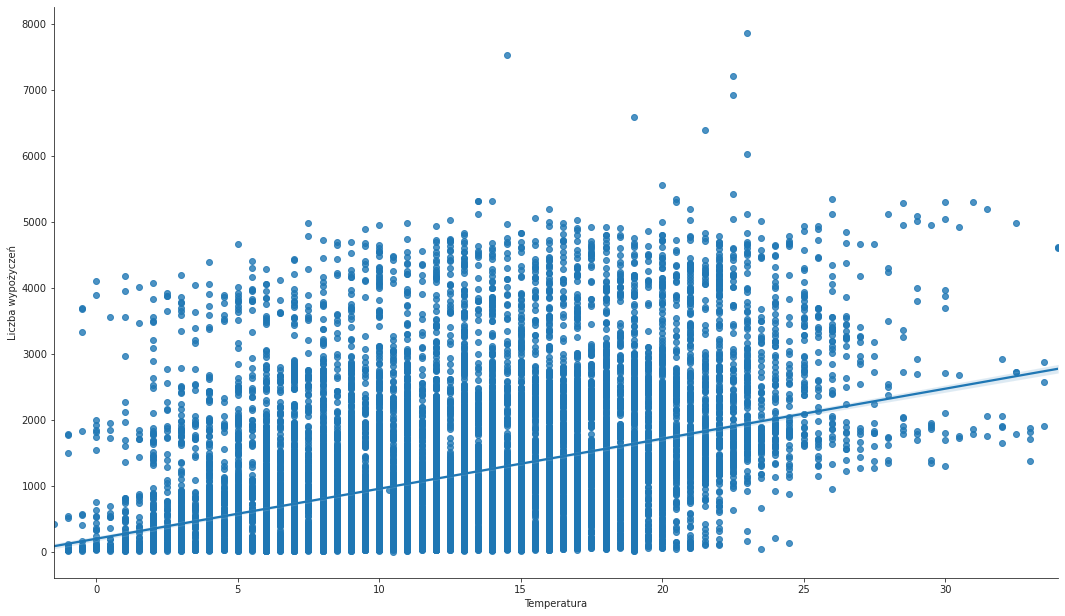

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18, 10.5)
ax = sns.regplot(x="t1", y="cnt", data=nowe_dane)
ax.set_xlabel('Temperatura')
ax.set_ylabel('Liczba wypożyczeń')
sns.despine()

Zależność między temperaturą, liczba wypożyczeń i okresem tygodnia.

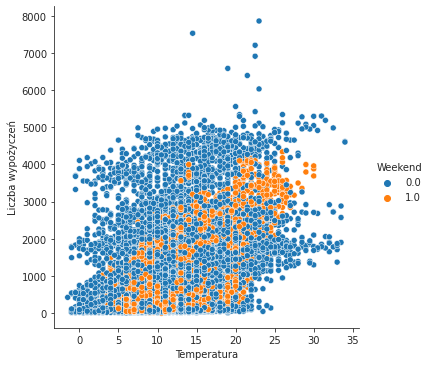

In [ ]:
ax = sns.relplot(x="t1", y="cnt", hue="is_weekend", data=nowe_dane);
ax._legend.set_title("Weekend")
ax.set_axis_labels(x_var="Temperatura", y_var="Liczba wypożyczeń")

W jakich godzinach sa wypożyczane rowery w wakacje i święta oraz w pozostały czas w roku.

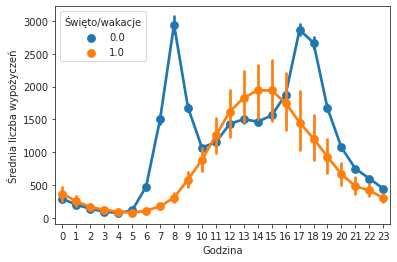

In [ ]:
ax = sns.pointplot(data=nowe_dane, x='hour', y='cnt', hue='is_holiday')
ax.set_xlabel('Godzina')
ax.set_ylabel('Średnia liczba wypożyczeń')
ax.legend(title = 'Święto/wakacje')

Jak zmieniała się liczba wypożyczeń na przestrzeni miesięcy i lat.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


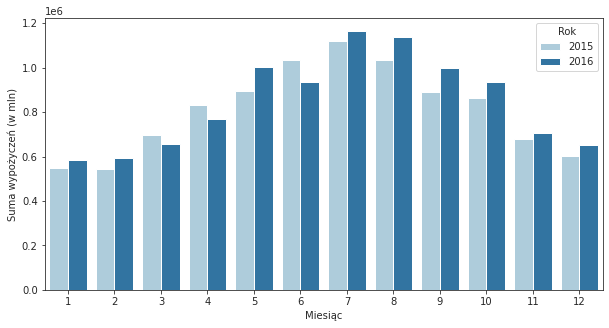

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot('month','cnt',hue='year',data=nowe_dane, palette='Paired', estimator = sum, ci=None)
ax.set_xlabel('Miesiąc')
ax.set_ylabel('Suma wypożyczeń (w mln)')
ax.legend(title = 'Rok')
plt.show()

Wypożyczenia w poszczególnych dniach tygodnia

Text(0, 0.5, 'Liczba wypożyczeń')

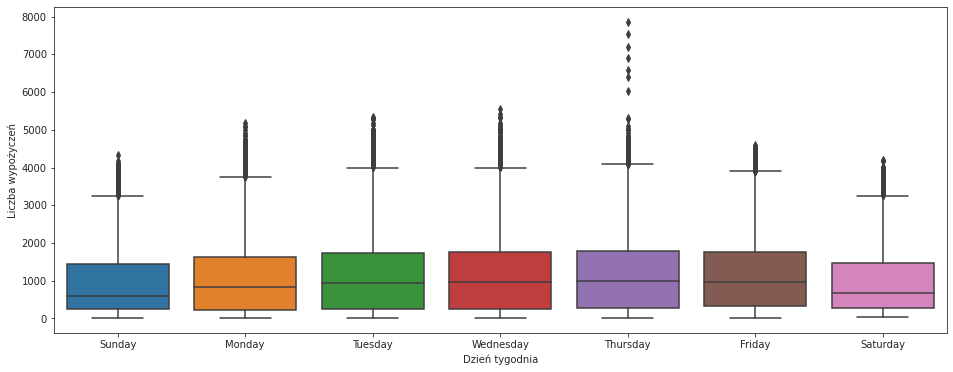

In [ ]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=nowe_dane,x=nowe_dane["day_of_week"],y=nowe_dane.cnt)
ax.set_xlabel('Dzień tygodnia')
ax.set_ylabel('Liczba wypożyczeń')

Godziny wypożyczeń ze wzgledu na porę roku.

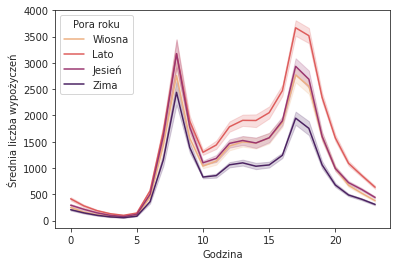

In [ ]:
ax = sns.lineplot(data=nowe_dane, x="hour", y="cnt", hue="season", palette="flare")
ax.set_xlabel('Godzina')
ax.set_ylabel('Średnia liczba wypożyczeń')
plt.legend(title = 'Pora roku', labels=['Wiosna', 'Lato', 'Jesień', 'Zima'])

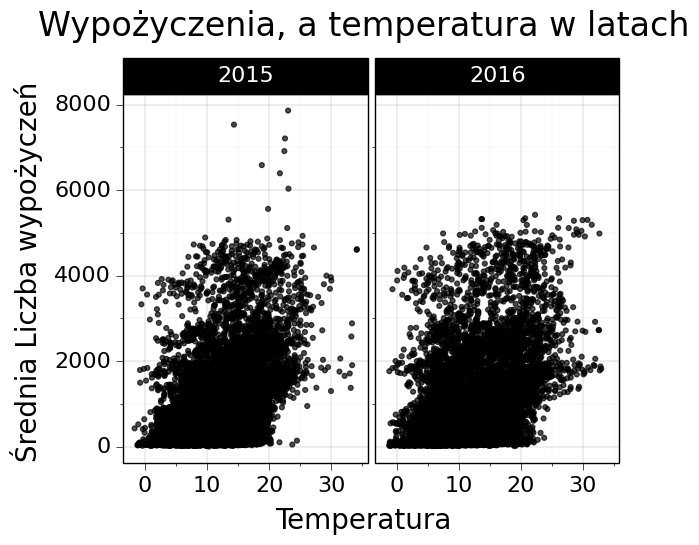

<ggplot: (8734432355476)>

In [ ]:
(
    ggplot(nowe_dane, aes('t1', 'cnt'))
  +geom_jitter(width = 0.25, alpha = 0.7, color = "black")
  +labs(y=" Średnia Liczba wypożyczeń",x="Temperatura", title = "Wypożyczenia, a temperatura w latach")
  +facet_grid('~year') + theme_linedraw(base_size = 20)
  )

W jaką pogodę wypożyczano rowery.

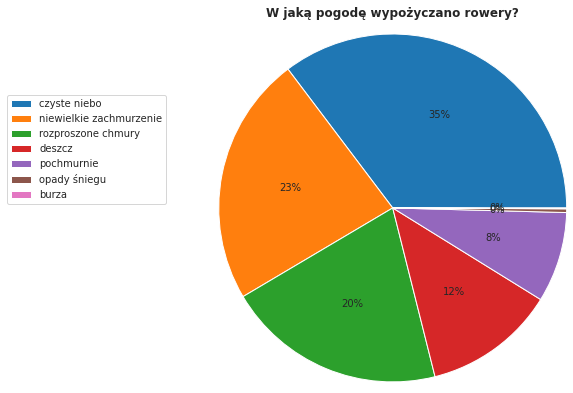

In [ ]:
pogoda = {
1 : "czyste niebo",
2 : "niewielkie zachmurzenie",
3 : "rozproszone chmury",
4 : "pochmurnie",
7 : "deszcz",
10 : "burza",
26 : "opady śniegu",
94 : "mroźna mgła"}
weather_counts = nowe_dane.weather_code.value_counts()
weather_counts.index = [pogoda[i] for i in weather_counts.index]

plt.title("W jaką pogodę wypożyczano rowery?",fontweight="bold", y=1.35)
plt.pie(weather_counts, autopct="%.0f%%", radius=2)
plt.legend(weather_counts.index, bbox_to_anchor=(0,0.5), loc="lower right", bbox_transform=plt.gcf().transFigure)
plt.show()

Wykres skrzypcowy zależności liczby wypożyczeń od rodzaju pogody.

[Text(0, 0, 'czyste niebo'),
 Text(0, 0, 'niewielkie zachmurzenie'),
 Text(0, 0, 'rozproszone chmury'),
 Text(0, 0, 'pochmurnie'),
 Text(0, 0, 'deszcz'),
 Text(0, 0, 'burza'),
 Text(0, 0, 'opady śniegu')]

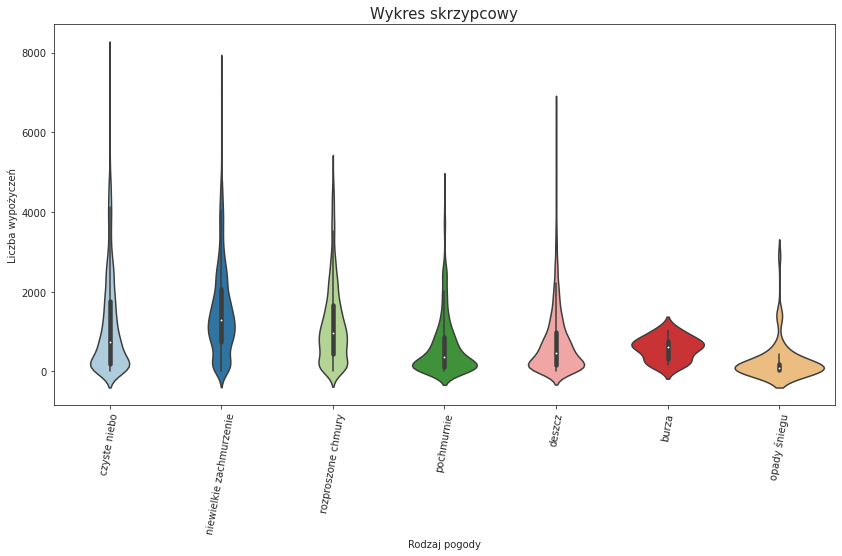

In [ ]:
plt.figure(figsize=(14,7))
ax = sns.violinplot(x="weather_code", y="cnt", data=nowe_dane, palette='Paired')
ax.axes.set_title("Wykres skrzypcowy", fontsize=15)
ax.set_xlabel('Rodzaj pogody')
ax.set_ylabel('Liczba wypożyczeń')
ax.set_xticklabels(["czyste niebo", "niewielkie zachmurzenie", "rozproszone chmury", "pochmurnie",  "deszcz",  "burza", "opady śniegu", "mroźna mgła" ], rotation=80)

Wykres linii trendu liczby wypożyczeń rowerów w podziale na pory dnia dla poszczególnych miesięcy.

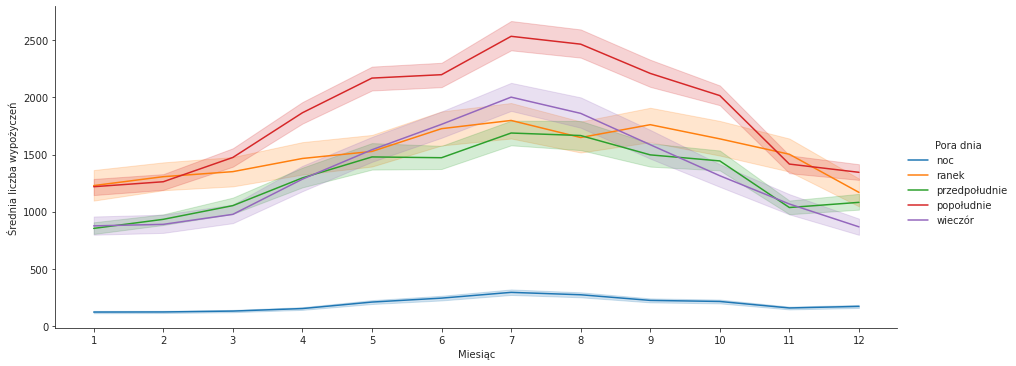

In [ ]:
ax = sns.relplot(data=nowe_dane[(nowe_dane['time_of_a_day'] == 'noc') | (nowe_dane['time_of_a_day'] == 'ranek') | (nowe_dane['time_of_a_day'] == 'przedpołudnie') | (nowe_dane['time_of_a_day'] == 'popołudnie') | (nowe_dane['time_of_a_day'] == 'wieczór')],
            x="month",
            y="cnt",
            aspect=2.5,
            kind='line',
            hue='time_of_a_day')
ax._legend.set_title("Pora dnia")
ax.set_axis_labels(x_var="Miesiąc", y_var="Średnia liczba wypożyczeń")
plt.xticks(range(1, 13))
plt.show()

Interaktywny wykres, w którym użytkownik może sprawdzić rozkład dla pożądanych zmiennych wybranym typem wykresu.


In [ ]:
@interact
def scatter_plot(x=list(nowe_dane.select_dtypes('number').columns),
                 y=list(nowe_dane.select_dtypes('number').columns), figtype=["scatter", "bar", "hist", "kde"]):
    plt.figure(figsize=(20,8))
    if figtype == "bar":
      g = sns.barplot(x=nowe_dane[x], y=nowe_dane[y], dodge=False, data=nowe_dane, palette='Paired')
      for item in g.get_xticklabels(): #obrócenie etykiet na osi x
        item.set_rotation(80)
    elif figtype =="scatter":
      g = sns.scatterplot(x=nowe_dane[x], y=nowe_dane[y],data=nowe_dane, palette='Paired')
    else:
      g = sns.displot(x=nowe_dane[x], y=nowe_dane[y], kind = figtype)

interactive(children=(Dropdown(description='x', options=('cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code…

Interaktywny wykres, w którym użytkownik może sprawdzić dzienną liczbę wypożyczeń w wybranym roku i miesiącu.

In [ ]:
@interact
def monswipes(rok = list(nowe_dane['year'].unique())+['All2'], miesiąc=list(nowe_dane['month'].unique())+['All']):

  if miesiąc is not 'All' and rok is not 'All2':
      filtered_df = nowe_dane[(nowe_dane['year']==rok) & (nowe_dane['month']==miesiąc)]
  else:
    filtered_df = nowe_dane

  xx = filtered_df["date"]
  yy = filtered_df["cnt"]
  plt.figure(figsize=(15,8)) #wielkość wykresu
  g = sns.barplot(x=xx, y=yy, estimator = sum, ci=None)
  for item in g.get_xticklabels(): #obrócenie etykiety na osi x
    item.set_rotation(80)
  g.set_xlabel('Data')
  g.set_ylabel('Suma liczby wypożyczeń')

/usr/local/lib/python3.6/dist-packages/ipywidgets/widgets/widget_selection.py:175: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  self.equals = kwargs.pop('equals', lambda x, y: x == y)


interactive(children=(Dropdown(description='rok', options=(2015, 2016, 'All2'), value=2015), Dropdown(descript…

Interaktywny wykres pudełkowy, w którym użytkownik może sprawdzić rozkład liczb wypożyczeń rowerów ze względu na prędkość wiatru i wybraną temperaturę.



In [ ]:
@interact
def tempswipes(temp=list(nowe_dane['t1'].unique())+['All']):
  if temp is not 'All':
    filtered_df = nowe_dane[nowe_dane['t1']==temp]
  else:
    filtered_df = nowe_dane
  xx = filtered_df["wind_speed"]
  yy = filtered_df["cnt"]
  plt.figure(figsize=(15,8)) #wielkość wykresu
  g = sns.boxplot(x=xx, y=yy, palette="flare")
  for item in g.get_xticklabels(): #obrócenie etykiety na osi x
    item.set_rotation(80)
  g.set_xlabel('Prędkość wiatru')
  g.set_ylabel('Liczba wypożyczeń')

/usr/local/lib/python3.6/dist-packages/ipywidgets/widgets/widget_selection.py:175: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  self.equals = kwargs.pop('equals', lambda x, y: x == y)


interactive(children=(Dropdown(description='temp', options=(3.0, 2.5, 2.0, 1.0, 1.5, 4.0, 5.0, 6.0, 6.5, 7.0, …